<a href="https://colab.research.google.com/github/FahmidaMitu/Predict-Causes-of-Absenteeism-among-Bangladeshi-University-Students/blob/main/Predict_Cause_of_Absenteeism_among_Bangladesh_University_Students_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Name: Cause of Absenteeism among University Students 

Reason ob Absences:

           1: 'House is far from the university',
           2: 'Transportation problem: Shortage of public commuting services',
           3: 'Lower economic income',
           4: 'I help my parents in their work, usually',
           5: 'I work and earn some money for my family while remaining absent',
           6: 'Have alternative leisure plans: cafeteria, sports, etc',
           7: 'Sleeping habit during class time',
           8: 'Back to back classes.',
           9: 'Become tired due to previous class',
           10: 'Problem with my parents',
           11: 'Financial Problem',
           12: 'Dont have any problems',
           13: 'Lecture quality is not good',
           14: 'Availability of recorded lecture material',

           15: 'Somewhat Easy to make up missed lecture',
           16: 'Very Difficult to understand the lecture',
           17: 'Internet packages are costly',
           
           18: 'Bad internet connection',
           19: 'Social media distraction',
           20: 'Movies/drugs/other attractions',
           21: 'Preparation for other courses',

           22: 'Health problems',
           23: 'Family members death'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# there are 58+ features, need to edit pandas default display settings

#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cse_445/Student-Absenteeism-Dataset-2.csv') # raw_data is the panda's dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2159
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Reason of Absence                 2072 non-null   int64 
 1   Degree                            2072 non-null   object
 2   Year                              2072 non-null   int64 
 3   Age                               2072 non-null   int64 
 4   Gender                            2072 non-null   object
 5   Housing                           2072 non-null   object
 6   Distance                          2072 non-null   int64 
 7   Cgpa                              2072 non-null   object
 8   Relationship Status               2072 non-null   object
 9   Family Income                     2072 non-null   int64 
 10  Employement Status                2072 non-null   object
 11  Personal Income                   2072 non-null   int64 
 12  Health Problem      

In [ ]:
# Tabular view of Data {shape of data, the type of data , the missing values , unique counts , % Missing}
# Creating the Data Dictionary with first column being datatype.
Data_dict = pd.DataFrame(df.dtypes)
# Identifying unique values . For this I've used nunique() which returns unique elements in the object.
Data_dict['UniqueVal'] = df.nunique()
# Identifying the missing values from the dataset.
Data_dict['MissingVal'] = df.isnull().sum()
# Percentage of Missing Values
Data_dict['Percent Missing'] = round(df.isnull().sum()/len(df)*100, 2)
# identifying count of the variable.
Data_dict['Count'] = df.count()
# Renaming the first column using rename()
Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict

DataType  UniqueVal  MissingVal  Percent Missing  Count
Id                                  int64        346           0             0.00   2160
Reason of Absence                 float64         23           8             0.37   2152
University                         object         81           0             0.00   2160
Degree                             object          9           0             0.00   2160
Year                                int64          4           0             0.00   2160
Age                                 int64         10           0             0.00   2160
Gender                             object          3           0             0.00   2160
Housing                            object          5           0             0.00   2160
Distance                            int64         27           0             0.00   2160
Cgpa                               object          4           0             0.00   2160
Relationship Status                object          3           0             0.00   2160
Family Income                       int64          5           0             0.00   2160
Employement Status                 object          3           0             0.00   2160
Personal Income                     int64          6           0             0.00   2160
Health Problem                     object          4           0             0.00   2160
Unconcern of Degree               float64          5          31             1.44   2129
Poor Economic Condition           float64          5          31             1.44   2129
High Expected Degree              float64          5          31             1.44   2129
Good Economic Condition           float64          5          31             1.44   2129
Dispirit by Unemployed senior     float64          5          31             1.44   2129
Health Trouble                    float64          5          38             1.76   2122
Insomnia                          float64          5          31             1.44   2129
Insecurity                        float64          5          31             1.44   2129
Thought of Failing                float64          5          39             1.81   2121
Study Pressure                    float64          5          39             1.81   2121
High Expectation of Parents       float64          5          20             0.93   2140
Parental Care                     float64          4          23             1.06   2137
Bad Peer                          float64          4          20             0.93   2140
Trafficjam                        float64          4          24             1.11   2136
Inclement Weather                 float64          4          35             1.62   2125
Ethnicity                           int64          5           0             0.00   2160
Educational Ignorance of Society    int64          5           0             0.00   2160
Job Opportunity                     int64          5           0             0.00   2160
Substandard Teaching Quality        int64          5           0             0.00   2160
Monotonous Class                    int64          5           0             0.00   2160
Neglected by Teacher                int64          5           0             0.00   2160
Teacher Unaware of Absenteeism      int64          5           0             0.00   2160
Despise Student Effort              int64          5           0             0.00   2160
Strict Teacher                      int64          5           0             0.00   2160
Theroretic Class                    int64          5           0             0.00   2160
Excessive Class Task                int64          5           0             0.00   2160
Irrelavent Course                   int64          5           0             0.00   2160
Dissimilar Course Content           int64          5           0             0.00   2160
Difficulty in Understanding         int64          5           0             0.00   2160
Too Many Exam               

In [ ]:
non_null_df = df.dropna(axis=0)
print('Before droping', df.shape)
print('After droping',non_null_df.shape)

Before droping (2160, 58)
After droping (2073, 58)


In [ ]:
df= non_null_df
df.head()

Id  Reason of Absence              University Degree  Year  Age Gender      Housing  Distance     Cgpa Relationship Status  Family Income Employement Status  Personal Income     Health Problem  Unconcern of Degree  Poor Economic Condition  High Expected Degree  Good Economic Condition  Dispirit by Unemployed senior  Health Trouble  Insomnia  Insecurity  Thought of Failing  Study Pressure  High Expectation of Parents  Parental Care  Bad Peer  Trafficjam  Inclement Weather  Ethnicity  Educational Ignorance of Society  Job Opportunity  Substandard Teaching Quality  Monotonous Class  Neglected by Teacher  Teacher Unaware of Absenteeism  Despise Student Effort  Strict Teacher  Theroretic Class  Excessive Class Task  Irrelavent Course  Dissimilar Course Content  Difficulty in Understanding  Too Many Exam  Internet Help  Consecutive Class  Inadequate Classroom  Unhelpful Classmate  Bullied by Classmate  Unaware Due to Online Class  Counselling Unavailable  Political Practise  \
0   1                6.0  North South University    BSC     4   24   Male  With Family         1  Average              Single          35000          Half-time                0  No health problem                  3.0                      3.0                   3.0                      2.0                            3.0             4.0       4.0         3.0                 4.0             3.0                          3.0            3.0       4.0         4.0                4.0          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                4.0                   3.0                  4.0                   3.0                          4.0                      3.0                 2.0   
1   1                7.0  North South University    BSC     4   24   Male  With Family         1  Average              Single          35000          Half-time                0  No health problem                  3.0                      3.0                   3.0                      2.0                            3.0             4.0       4.0         3.0                 4.0             3.0                          3.0            3.0       4.0         4.0                4.0          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                4.0                   3.0                  4.0                   3.0                          4.0                      3.0                 2.0   
2   1               12.0  North South University    BSC     4   24   Male  With Family         1  Average              Single          35000          Half-time                0  No health problem                  3.0                      3.0                   3.0                      2.0                            3.0             4.0       4.0         3.0                 4.0             3.0                          3.0            3.0       4.0         4.0                4.0          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                4.0                   3.0                  4.0                   3.0                          4.0                      3.0                 2.0   
3   1               14.0  North South Universit

In [ ]:
#dropping duplicate rows
df.drop_duplicates(inplace = True)
print(df.shape) #one duplicate row removed

(2072, 58)


In [ ]:
#converting column types to int
df['Reason of Absence'] = df['Reason of Absence'].astype(int)
df['Unconcern of Degree'] = df['Unconcern of Degree'].astype(int)
df['Poor Economic Condition'] = df['Poor Economic Condition'].astype(int)
df['High Expected Degree'] = df['High Expected Degree'].astype(int)
df['Good Economic Condition'] = df['Good Economic Condition'].astype(int)
df['Dispirit by Unemployed senior'] = df['Dispirit by Unemployed senior'].astype(int)
df['Health Trouble'] = df['Health Trouble'].astype(int)
df['Insomnia'] = df['Insomnia'].astype(int)
df['Insecurity'] = df['Insecurity'].astype(int)
df['Thought of Failing'] = df['Thought of Failing'].astype(int) 
df['Study Pressure'] = df['Study Pressure'].astype(int)
df['High Expectation of Parents'] = df['High Expectation of Parents'].astype(int)
df['Parental Care'] = df['Parental Care'].astype(int)
df['Bad Peer'] = df['Bad Peer'].astype(int)
df['Trafficjam'] = df['Trafficjam'].astype(int)
df['Inclement Weather'] = df['Inclement Weather'].astype(int)
df['Internet Help'] = df['Internet Help'].astype(int)
df['Consecutive Class'] = df['Consecutive Class'].astype(int)
df['Inadequate Classroom'] = df['Inadequate Classroom'].astype(int)
df['Unhelpful Classmate'] = df['Unhelpful Classmate'].astype(int)
df['Bullied by Classmate'] = df['Bullied by Classmate'].astype(int)
df['Unaware Due to Online Class'] = df['Unaware Due to Online Class'].astype(int)
df['Counselling Unavailable'] = df['Counselling Unavailable'].astype(int)
df['Political Practise'] = df['Political Practise'].astype(int)
df['No Professional Development'] = df['No Professional Development'].astype(int)
df['Unaware to Inform Parents'] = df['Unaware to Inform Parents'].astype(int)

In [ ]:
df.head()

Id  Reason of Absence              University Degree  Year  Age Gender      Housing  Distance     Cgpa Relationship Status  Family Income Employement Status  Personal Income     Health Problem  Unconcern of Degree  Poor Economic Condition  High Expected Degree  Good Economic Condition  Dispirit by Unemployed senior  Health Trouble  Insomnia  Insecurity  Thought of Failing  Study Pressure  High Expectation of Parents  Parental Care  Bad Peer  Trafficjam  Inclement Weather  Ethnicity  Educational Ignorance of Society  Job Opportunity  Substandard Teaching Quality  Monotonous Class  Neglected by Teacher  Teacher Unaware of Absenteeism  Despise Student Effort  Strict Teacher  Theroretic Class  Excessive Class Task  Irrelavent Course  Dissimilar Course Content  Difficulty in Understanding  Too Many Exam  Internet Help  Consecutive Class  Inadequate Classroom  Unhelpful Classmate  Bullied by Classmate  Unaware Due to Online Class  Counselling Unavailable  Political Practise  \
0   1                  6  North South University    BSC     4   24   Male  With Family         1  Average              Single          35000          Half-time                0  No health problem                    3                        3                     3                        2                              3               4         4           3                   4               3                            3              3         4           4                  4          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                  4                     3                    4                     3                            4                        3                   2   
1   1                  7  North South University    BSC     4   24   Male  With Family         1  Average              Single          35000          Half-time                0  No health problem                    3                        3                     3                        2                              3               4         4           3                   4               3                            3              3         4           4                  4          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                  4                     3                    4                     3                            4                        3                   2   
2   1                 12  North South University    BSC     4   24   Male  With Family         1  Average              Single          35000          Half-time                0  No health problem                    3                        3                     3                        2                              3               4         4           3                   4               3                            3              3         4           4                  4          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                  4                     3                    4                     3                            4                        3                   2   
3   1                 14  North South Universit

In [ ]:
#Converting Binary=Yes No to Int
df['Language Skills'] = df['Language Skills'].map({'No': 0, 'Maybe': 1, 'Yes':2})
df['Lack of Sporsts Facility'] = df['Lack of Sporsts Facility'].map({'No': 0, 'Maybe':1, 'Yes': 2})

In [ ]:
# Tabular view of Data {shape of data, the type of data , the missing values , unique counts , % Missing}
# Creating the Data Dictionary with first column being datatype.
Data_dict = pd.DataFrame(df.dtypes)
# Identifying unique values . For this I've used nunique() which returns unique elements in the object.
Data_dict['UniqueVal'] = df.nunique()
# Identifying the missing values from the dataset.
Data_dict['MissingVal'] = df.isnull().sum()
# Percentage of Missing Values
Data_dict['Percent Missing'] = round(df.isnull().sum()/len(df)*100, 2)
# identifying count of the variable.
Data_dict['Count'] = df.count()
# Renaming the first column using rename()
Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict

DataType  UniqueVal  MissingVal  Percent Missing  Count
Id                                  int64        331           0              0.0   2072
Reason of Absence                   int32         23           0              0.0   2072
University                         object         78           0              0.0   2072
Degree                             object          9           0              0.0   2072
Year                                int64          4           0              0.0   2072
Age                                 int64         10           0              0.0   2072
Gender                             object          3           0              0.0   2072
Housing                            object          5           0              0.0   2072
Distance                            int64         26           0              0.0   2072
Cgpa                               object          4           0              0.0   2072
Relationship Status                object          3           0              0.0   2072
Family Income                       int64          5           0              0.0   2072
Employement Status                 object          3           0              0.0   2072
Personal Income                     int64          6           0              0.0   2072
Health Problem                     object          4           0              0.0   2072
Unconcern of Degree                 int32          5           0              0.0   2072
Poor Economic Condition             int32          5           0              0.0   2072
High Expected Degree                int32          5           0              0.0   2072
Good Economic Condition             int32          5           0              0.0   2072
Dispirit by Unemployed senior       int32          5           0              0.0   2072
Health Trouble                      int32          5           0              0.0   2072
Insomnia                            int32          5           0              0.0   2072
Insecurity                          int32          5           0              0.0   2072
Thought of Failing                  int32          5           0              0.0   2072
Study Pressure                      int32          5           0              0.0   2072
High Expectation of Parents         int32          5           0              0.0   2072
Parental Care                       int32          4           0              0.0   2072
Bad Peer                            int32          4           0              0.0   2072
Trafficjam                          int32          4           0              0.0   2072
Inclement Weather                   int32          4           0              0.0   2072
Ethnicity                           int64          5           0              0.0   2072
Educational Ignorance of Society    int64          5           0              0.0   2072
Job Opportunity                     int64          5           0              0.0   2072
Substandard Teaching Quality        int64          5           0              0.0   2072
Monotonous Class                    int64          5           0              0.0   2072
Neglected by Teacher                int64          5           0              0.0   2072
Teacher Unaware of Absenteeism      int64          5           0              0.0   2072
Despise Student Effort              int64          5           0              0.0   2072
Strict Teacher                      int64          5           0              0.0   2072
Theroretic Class                    int64          5           0              0.0   2072
Excessive Class Task                int64          5           0              0.0   2072
Irrelavent Course                   int64          5           0              0.0   2072
Dissimilar Course Content           int64          5           0              0.0   2072
Difficulty in Understanding         int64          5           0              0.0   2072
Too Many Exam               

In [ ]:
# investigate elements per feature
for cols in df.columns:
    unique_vals = df[cols].unique()
    nr_unique_vals = len(unique_vals)
    if nr_unique_vals < 11:
        print("Feature ", cols, " has = ", nr_unique_vals, " unique values including =>", unique_vals)
    else:
        print("Feature ", cols, " has =", nr_unique_vals)

Feature  Id  has = 331
Feature  Reason of Absence  has = 23
Feature  University  has = 78
Feature  Degree  has =  9  unique values including => ['BSC' 'BBA' 'BA' 'BFTech' 'B Soc' 'MBBS' 'B Arch' ' BSC' 'B Pharm']
Feature  Year  has =  4  unique values including => [4 3 2 1]
Feature  Age  has =  10  unique values including => [24 21 23 22 20 19 25 26 27 18]
Feature  Gender  has =  3  unique values including => ['Male' 'Female' 'Other']
Feature  Housing  has =  5  unique values including => ['With Family' 'Without family' 'Hostel' 'Mess' 'In mess']
Feature  Distance  has = 26
Feature  Cgpa  has =  4  unique values including => ['Average' 'Good' 'Excellent' 'Poor']
Feature  Relationship Status  has =  3  unique values including => ['Single' 'In relationship' 'Married']
Feature  Family Income  has =  5  unique values including => [35000 40000 10000 25000 15000]
Feature  Employement Status  has =  3  unique values including => ['Half-time' 'Unemployed' 'Full-time']
Feature  Personal Income 

In [ ]:
df.columns

Index(['Id', 'Reason of Absence', 'University', 'Degree', 'Year', 'Age', 'Gender', 'Housing', 'Distance', 'Cgpa', 'Relationship Status', 'Family Income', 'Employement Status', 'Personal Income', 'Health Problem', 'Unconcern of Degree', 'Poor Economic Condition', 'High Expected Degree', 'Good Economic Condition', 'Dispirit by Unemployed senior', 'Health Trouble', 'Insomnia', 'Insecurity', 'Thought of Failing', 'Study Pressure', 'High Expectation of Parents', 'Parental Care', 'Bad Peer', 'Trafficjam', 'Inclement Weather', 'Ethnicity', 'Educational Ignorance of Society', 'Job Opportunity', 'Substandard Teaching Quality', 'Monotonous Class', 'Neglected by Teacher', 'Teacher Unaware of Absenteeism', 'Despise Student Effort', 'Strict Teacher', 'Theroretic Class', 'Excessive Class Task', 'Irrelavent Course', 'Dissimilar Course Content', 'Difficulty in Understanding', 'Too Many Exam', 'Internet Help', 'Consecutive Class', 'Inadequate Classroom', 'Unhelpful Classmate', 'Bullied by Classmate',
 

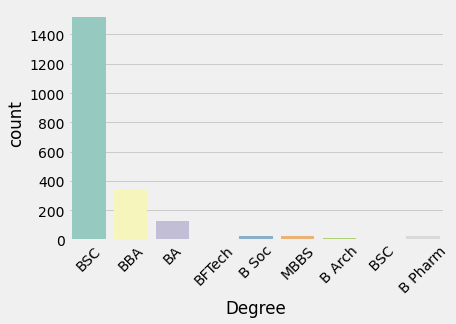

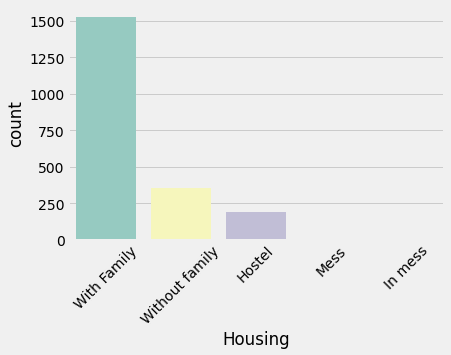

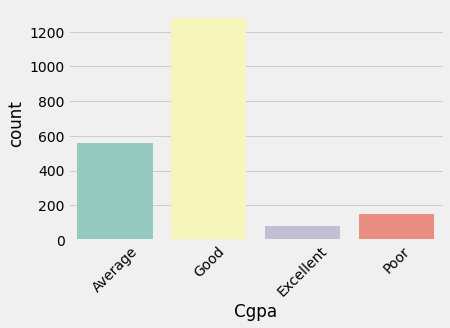

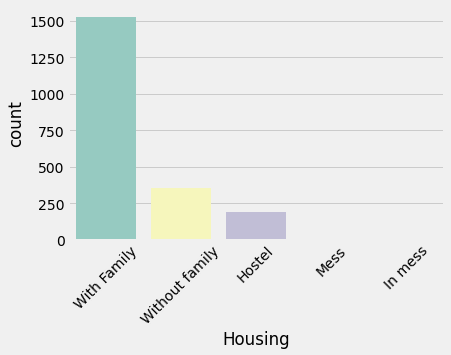

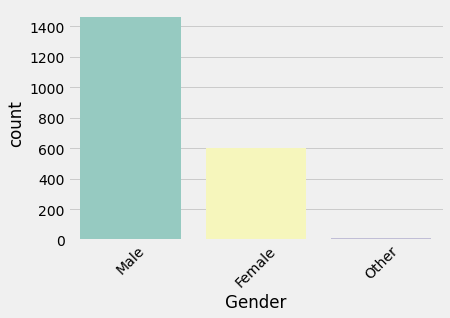

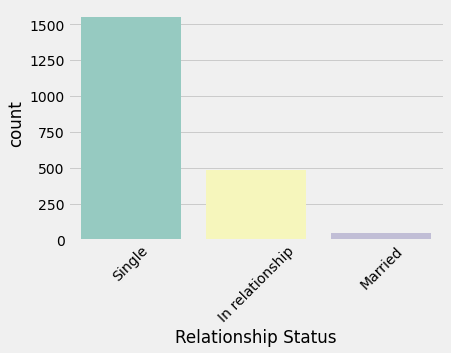

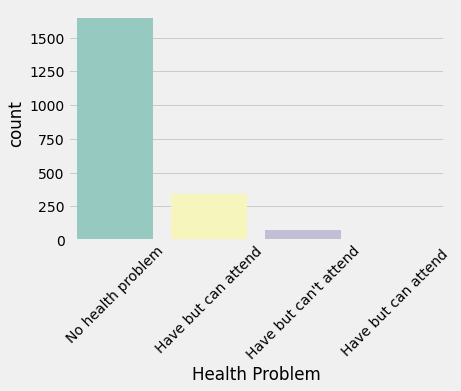

In [ ]:
# Looping through all the categorical features by our y variable - see if there is relationship
new_data_frame = df
features = ['Degree', 'Housing','Cgpa','Housing', 'Gender','Relationship Status','Health Problem',  ]

for f in features:
    sns.countplot(x = f, data = new_data_frame, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
#Neumerical Features
numerical_features = [ 'Year', 'Age',  'Distance',  'Family Income',  'Personal Income',  'Unconcern of Degree', 'Poor Economic Condition', 'High Expected Degree', 'Good Economic Condition', 'Dispirit by Unemployed senior', 'Health Trouble', 'Insomnia', 'Insecurity', 'Thought of Failing', 'Study Pressure', 'High Expectation of Parents', 'Parental Care', 'Bad Peer', 'Trafficjam', 'Inclement Weather', 'Ethnicity', 'Educational Ignorance of Society', 'Job Opportunity', 'Substandard Teaching Quality', 'Monotonous Class', 'Neglected by Teacher', 'Teacher Unaware of Absenteeism', 'Despise Student Effort', 'Strict Teacher', 'Theroretic Class', 'Excessive Class Task', 'Irrelavent Course', 'Dissimilar Course Content', 'Difficulty in Understanding', 'Too Many Exam', 'Internet Help', 'Consecutive Class', 'Inadequate Classroom', 'Unhelpful Classmate', 'Bullied by Classmate',
       'Unaware Due to Online Class', 'Counselling Unavailable', 'Political Practise', 'No Professional Development', 'Unaware to Inform Parents', 'Lack of Sporsts Facility', 'Language Skills', 'Absence Days']
#Catagorical Features
catagorical_features = ['Reason of Absence','Degree', 'Housing','Cgpa','Housing', 'Employement Status', 'Gender','Relationship Status','Health Problem']

In [ ]:
#Dropping Unnecessary columns
new_data_frame.drop(['Id', 'University'], axis=1, inplace=True)
new_data_frame.head()

Reason of Absence Degree  Year  Age Gender      Housing  Distance     Cgpa Relationship Status  Family Income Employement Status  Personal Income     Health Problem  Unconcern of Degree  Poor Economic Condition  High Expected Degree  Good Economic Condition  Dispirit by Unemployed senior  Health Trouble  Insomnia  Insecurity  Thought of Failing  Study Pressure  High Expectation of Parents  Parental Care  Bad Peer  Trafficjam  Inclement Weather  Ethnicity  Educational Ignorance of Society  Job Opportunity  Substandard Teaching Quality  Monotonous Class  Neglected by Teacher  Teacher Unaware of Absenteeism  Despise Student Effort  Strict Teacher  Theroretic Class  Excessive Class Task  Irrelavent Course  Dissimilar Course Content  Difficulty in Understanding  Too Many Exam  Internet Help  Consecutive Class  Inadequate Classroom  Unhelpful Classmate  Bullied by Classmate  Unaware Due to Online Class  Counselling Unavailable  Political Practise  No Professional Development  \
0                  6    BSC     4   24   Male  With Family         1  Average              Single          35000          Half-time                0  No health problem                    3                        3                     3                        2                              3               4         4           3                   4               3                            3              3         4           4                  4          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                  4                     3                    4                     3                            4                        3                   2                            3   
1                  7    BSC     4   24   Male  With Family         1  Average              Single          35000          Half-time                0  No health problem                    3                        3                     3                        2                              3               4         4           3                   4               3                            3              3         4           4                  4          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                  4                     3                    4                     3                            4                        3                   2                            3   
2                 12    BSC     4   24   Male  With Family         1  Average              Single          35000          Half-time                0  No health problem                    3                        3                     3                        2                              3               4         4           3                   4               3                            3              3         4           4                  4          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                  4                     3                    4                     3                            4                        3                   2                            3   
3                 14    BSC     4   24   Ma

In [ ]:
#Making numeric representation of catagorical variables
new_data_frame= pd.get_dummies(df, columns =catagorical_features )
print("Shape of dataframe after converting into Neumerical=",new_data_frame.shape)

Shape of dataframe after converting into Neumerical= (2072, 107)


In [ ]:
new_data_frame.head()

Year  Age  Distance  Family Income  Personal Income  Unconcern of Degree  Poor Economic Condition  High Expected Degree  Good Economic Condition  Dispirit by Unemployed senior  Health Trouble  Insomnia  Insecurity  Thought of Failing  Study Pressure  High Expectation of Parents  Parental Care  Bad Peer  Trafficjam  Inclement Weather  Ethnicity  Educational Ignorance of Society  Job Opportunity  Substandard Teaching Quality  Monotonous Class  Neglected by Teacher  Teacher Unaware of Absenteeism  Despise Student Effort  Strict Teacher  Theroretic Class  Excessive Class Task  Irrelavent Course  Dissimilar Course Content  Difficulty in Understanding  Too Many Exam  Internet Help  Consecutive Class  Inadequate Classroom  Unhelpful Classmate  Bullied by Classmate  Unaware Due to Online Class  Counselling Unavailable  Political Practise  No Professional Development  Unaware to Inform Parents  Lack of Sporsts Facility  Language Skills  Absence Days  Reason of Absence_1  \
0     4   24         1          35000                0                    3                        3                     3                        2                              3               4         4           3                   4               3                            3              3         4           4                  4          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                  4                     3                    4                     3                            4                        3                   2                            3                          3                         2                1             7                    0   
1     4   24         1          35000                0                    3                        3                     3                        2                              3               4         4           3                   4               3                            3              3         4           4                  4          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                  4                     3                    4                     3                            4                        3                   2                            3                          3                         2                1             7                    0   
2     4   24         1          35000                0                    3                        3                     3                        2                              3               4         4           3                   4               3                            3              3         4           4                  4          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                  4                     3                    4                     3                            4                        3                   2                            3                          3                         2                1             7                    0   
3     4   24         1          35000                0                    3

## Scaling the dataset

In [ ]:
new_data_frame.describe()

Year          Age     Distance  Family Income  Personal Income  Unconcern of Degree  Poor Economic Condition  High Expected Degree  Good Economic Condition  Dispirit by Unemployed senior  Health Trouble     Insomnia   Insecurity  Thought of Failing  Study Pressure  High Expectation of Parents  Parental Care     Bad Peer   Trafficjam  Inclement Weather    Ethnicity  Educational Ignorance of Society  Job Opportunity  Substandard Teaching Quality  Monotonous Class  Neglected by Teacher  Teacher Unaware of Absenteeism  Despise Student Effort  Strict Teacher  Theroretic Class  Excessive Class Task  Irrelavent Course  Dissimilar Course Content  Difficulty in Understanding  Too Many Exam  Internet Help  Consecutive Class  Inadequate Classroom  Unhelpful Classmate  Bullied by Classmate  Unaware Due to Online Class  Counselling Unavailable  Political Practise  No Professional Development  Unaware to Inform Parents  Lack of Sporsts Facility  Language Skills  Absence Days  \
count  2072.000000  2072.000000  2072.000000    2072.000000      2072.000000          2072.000000              2072.000000           2072.000000              2072.000000                    2072.000000     2072.000000  2072.000000  2072.000000         2072.000000     2072.000000                  2072.000000    2072.000000  2072.000000  2072.000000        2072.000000  2072.000000                       2072.000000      2072.000000                   2072.000000       2072.000000           2072.000000                     2072.000000             2072.000000     2072.000000       2072.000000           2072.000000        2072.000000                2072.000000                  2072.000000    2072.000000    2072.000000        2072.000000           2072.000000          2072.000000           2072.000000                  2072.000000              2072.000000         2072.000000                  2072.000000                2072.000000               2072.000000      2072.000000   2072.000000   
mean      3.547780     0.471364     0.069816       0.833494         0.204030             2.501931                 2.347008              2.694015                 2.316602                       3.017375        3.308880     3.388031     2.589768            2.664093        3.084942                     2.805019       2.446911     2.486486     3.085907           3.120174     2.676158                          2.892375         3.180502                      3.384170          3.661197              3.307432                        3.133687                3.119691        3.132239          3.333012              3.420849           3.260618                   3.217664                     3.212838       3.287645       3.496622           3.167471              2.693050             3.077703              2.210425                     2.797297                 2.609073            2.264479                     2.870656                   2.513031                  1.220077         0.872587      0.897201   
std       0.737775     0.165997     0.075171       0.294084         0.310344             1.207172                 1.088880              1.143074                 1.148616                       1.292061        1.181361     1.167321     1.121172            1.255833        1.286758                     1.330333       1.033051     1.020699     1.023790           0.978543     1.067428                          1.096282         1.188325                      1.160304          1.096097              1.177441                        1.130322                1.140179        1.152699          1.155304              1.174125           1.190106                   1.082505                     1.092784       1.085563       1.132884           1.087857              1.037394             1.182622              1.089933                     1.126663                 1.162207            1.114209                     1.194575                   1.114335                  0.803074         0.794830      0.775999   
min       1.000000     0.000000     0.0000

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#the columns that require scaling include
# Family Income
# Age
# Personal Income
#Distance
scale_vars = ['Family Income','Personal Income','Age','Distance']
scaler = MinMaxScaler()
new_data_frame[scale_vars] = scaler.fit_transform(new_data_frame[scale_vars])
new_data_frame.head()

Year       Age  Distance  Family Income  Personal Income  Unconcern of Degree  Poor Economic Condition  High Expected Degree  Good Economic Condition  Dispirit by Unemployed senior  Health Trouble  Insomnia  Insecurity  Thought of Failing  Study Pressure  High Expectation of Parents  Parental Care  Bad Peer  Trafficjam  Inclement Weather  Ethnicity  Educational Ignorance of Society  Job Opportunity  Substandard Teaching Quality  Monotonous Class  Neglected by Teacher  Teacher Unaware of Absenteeism  Despise Student Effort  Strict Teacher  Theroretic Class  Excessive Class Task  Irrelavent Course  Dissimilar Course Content  Difficulty in Understanding  Too Many Exam  Internet Help  Consecutive Class  Inadequate Classroom  Unhelpful Classmate  Bullied by Classmate  Unaware Due to Online Class  Counselling Unavailable  Political Practise  No Professional Development  Unaware to Inform Parents  Lack of Sporsts Facility  Language Skills  Absence Days  Reason of Absence_1  \
0     4  0.666667       0.0       0.833333              0.0                    3                        3                     3                        2                              3               4         4           3                   4               3                            3              3         4           4                  4          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                  4                     3                    4                     3                            4                        3                   2                            3                          3                         2                1             3                    0   
1     4  0.666667       0.0       0.833333              0.0                    3                        3                     3                        2                              3               4         4           3                   4               3                            3              3         4           4                  4          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                  4                     3                    4                     3                            4                        3                   2                            3                          3                         2                1             3                    0   
2     4  0.666667       0.0       0.833333              0.0                    3                        3                     3                        2                              3               4         4           3                   4               3                            3              3         4           4                  4          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                  4                     3                    4                     3                            4                        3                   2                            3                          3                         2                1             3                    0   
3     4  0.666667       0.0       0.833333             

### Feature Selection using pearson algorithm

We also converted the target variable, Absenteeism days, to categorical variable for our initial analysis. The following are the thresholds we used to convert our target variable to categorical variable.

Target Value Threshold by Groups

Group Number Threshold

Group-1: Absance days=0

Group-2: 0 < Absence days <= 3

Group-3: 3> Absence days <=5

Group-4: absence days >5


In [ ]:
new_data_frame2 = new_data_frame
g1 = (new_data_frame2['Absence Days']==0)
g2 = (new_data_frame2['Absence Days']>0) & (new_data_frame2['Absence Days']<=3)
g3 = (new_data_frame2['Absence Days']>3) & (new_data_frame2['Absence Days']<=5)
g4 = (new_data_frame2['Absence Days']>5)

In [ ]:
#assigning Group values
new_data_frame2.loc[g1,'Absence Days'] = 0
new_data_frame2.loc[g2,'Absence Days'] = 1
new_data_frame2.loc[g3,'Absence Days'] = 2
new_data_frame2.loc[g4,'Absence Days'] = 3

In [ ]:
new_data_frame2['Absence Days'].value_counts()

1    1444
0     628
Name: Absence Days, dtype: int64

In [ ]:
target = new_data_frame2['Absence Days']

In [ ]:
# Separate the independent (X) and dependent (y) features
y = target
X = new_data_frame2.drop(columns = 'Absence Days')

In [ ]:
X.head()

Year       Age  Distance  Family Income  Personal Income  Unconcern of Degree  Poor Economic Condition  High Expected Degree  Good Economic Condition  Dispirit by Unemployed senior  Health Trouble  Insomnia  Insecurity  Thought of Failing  Study Pressure  High Expectation of Parents  Parental Care  Bad Peer  Trafficjam  Inclement Weather  Ethnicity  Educational Ignorance of Society  Job Opportunity  Substandard Teaching Quality  Monotonous Class  Neglected by Teacher  Teacher Unaware of Absenteeism  Despise Student Effort  Strict Teacher  Theroretic Class  Excessive Class Task  Irrelavent Course  Dissimilar Course Content  Difficulty in Understanding  Too Many Exam  Internet Help  Consecutive Class  Inadequate Classroom  Unhelpful Classmate  Bullied by Classmate  Unaware Due to Online Class  Counselling Unavailable  Political Practise  No Professional Development  Unaware to Inform Parents  Lack of Sporsts Facility  Language Skills  Reason of Absence_1  Reason of Absence_2  \
0     4  0.666667       0.0       0.833333              0.0                    3                        3                     3                        2                              3               4         4           3                   4               3                            3              3         4           4                  4          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                  4                     3                    4                     3                            4                        3                   2                            3                          3                         2                1                    0                    0   
1     4  0.666667       0.0       0.833333              0.0                    3                        3                     3                        2                              3               4         4           3                   4               3                            3              3         4           4                  4          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                  4                     3                    4                     3                            4                        3                   2                            3                          3                         2                1                    0                    0   
2     4  0.666667       0.0       0.833333              0.0                    3                        3                     3                        2                              3               4         4           3                   4               3                            3              3         4           4                  4          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                  4                     3                    4                     3                            4                        3                   2                            3                          3                         2                1                    0                    0   
3     4  0.666667       0.0

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Absence Days, dtype: int64

In [ ]:
# Let's split the data into train and test set
# Note that correlation will be done only on the training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state =45 )

In [ ]:
# let's import the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Let's find the feature correlations

corr = X_train.corr()
corr

# Note that the correlation values lie between -1 and +1
# A correlation value close to -1 indicates a strong negative linear correlation
# A correlation value close to +1 indicates a strong positive linear correlation
# A correlation value close to 0 indicates no linear correlation

Year       Age  Distance  Family Income  Personal Income  Unconcern of Degree  Poor Economic Condition  High Expected Degree  Good Economic Condition  Dispirit by Unemployed senior  Health Trouble  Insomnia  Insecurity  Thought of Failing  Study Pressure  High Expectation of Parents  Parental Care  Bad Peer  Trafficjam  Inclement Weather  Ethnicity  Educational Ignorance of Society  Job Opportunity  Substandard Teaching Quality  Monotonous Class  Neglected by Teacher  Teacher Unaware of Absenteeism  Despise Student Effort  Strict Teacher  Theroretic Class  Excessive Class Task  Irrelavent Course  Dissimilar Course Content  Difficulty in Understanding  Too Many Exam  Internet Help  Consecutive Class  Inadequate Classroom  Unhelpful Classmate  Bullied by Classmate  Unaware Due to Online Class  Counselling Unavailable  Political Practise  No Professional Development  Unaware to Inform Parents  Lack of Sporsts Facility  Language Skills  \
Year                                  1.000000  0.694095  0.042475       0.079282         0.093978            -0.045238                -0.100406              0.030557                -0.068968                      -0.054182        0.015347  0.010222   -0.031154           -0.045999       -0.032026                    -0.098240      -0.023610 -0.005654    0.052502           0.015538  -0.051794                         -0.016602        -0.037757                     -0.067220         -0.040937              0.000908                        0.021075                0.031307       -0.056323          0.008322              0.010583           0.018844                  -0.052133                     0.016857      -0.004348      -0.003729           0.008919              0.017422             0.009142              0.036447                     0.095625                 0.080765            0.016522                     0.001603                  -0.050237                 -0.015241         0.001743   
Age                                   0.694095  1.000000  0.087235       0.018634        -0.003279            -0.117717                -0.151851             -0.019451                -0.095002                      -0.112346       -0.061554 -0.028237   -0.155621           -0.082445       -0.083318                    -0.087896      -0.107323 -0.086162    0.008526          -0.000982  -0.191242                         -0.093478        -0.073622                     -0.089165         -0.054794             -0.039701                       -0.063233               -0.039121       -0.134392         -0.043528             -0.003834           0.009533                  -0.062831                    -0.051078      -0.072052      -0.007459          -0.107758             -0.074946            -0.014688              0.003402                     0.051587                -0.023841           -0.047023                    -0.045926                  -0.100553                  0.010749        -0.031836   
Distance                              0.042475  0.087235  1.000000      -0.092812        -0.077938            -0.003926                -0.029067              0.030746                 0.060719                       0.063881        0.023954  0.014296    0.015187            0.049195        0.089666                    -0.025199      -0.066589 -0.080349    0.141281           0.023594  -0.011589                          0.041663         0.057150                      0.057537          0.063295              0.071009                        0.075959                0.018193        0.000344         -0.029057              0.042580           0.001140                   0.070959                     0.048777       0.071606       0.021723           0.011755              0.043262             0.093009              0.048755                     0.090609                 0.015465           -0.081114                     0.049519                  -0.030958                  0.032238         0.037862   
Family Income                         0.079282  0.018634 -0.092812       1.000

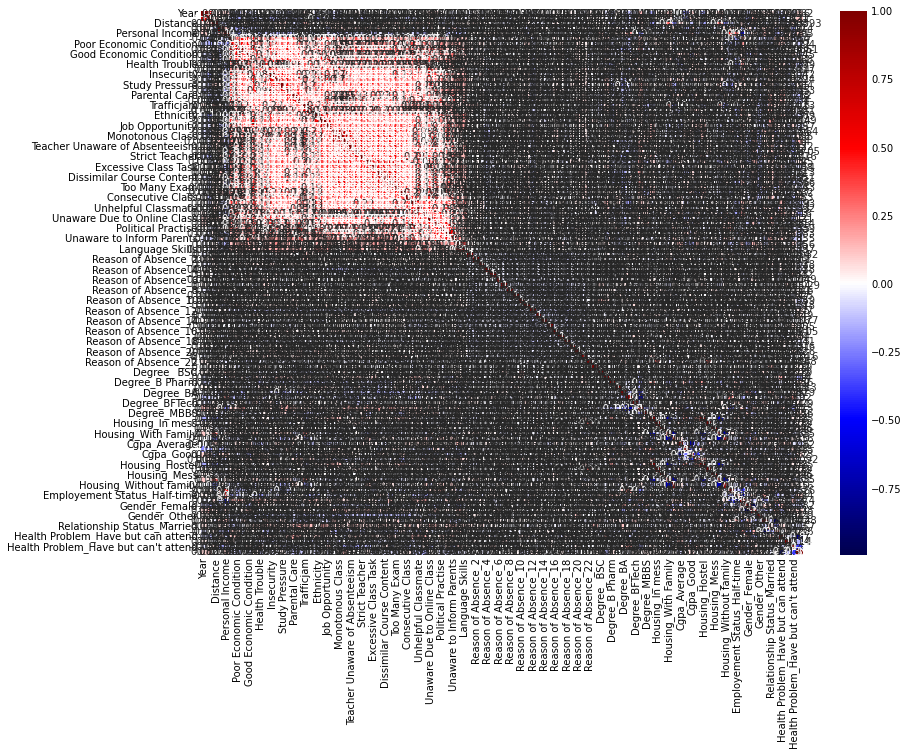

In [ ]:
# A good way to visualize correlation is using a heatmap
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic");
# A link to choose different cmaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

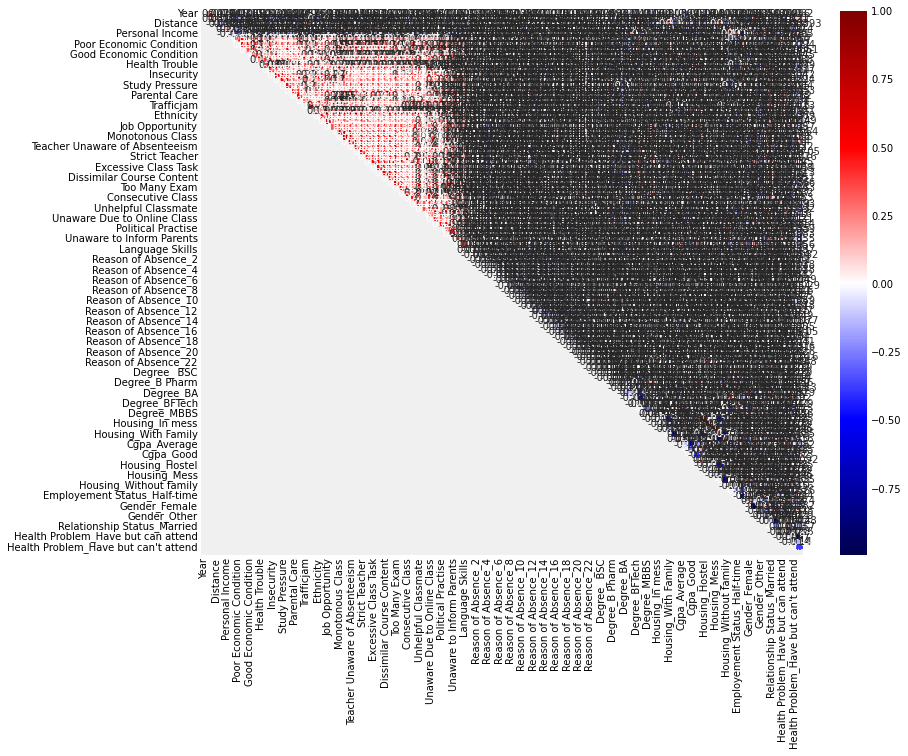

In [ ]:
# use of the mask 
import numpy as np
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask2);

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.8) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

10
{'Gender_Male', 'Relationship Status_Single', 'Housing_With Family', 'Housing_In mess', 'Housing_Without family', 'Employement Status_Unemployed', 'Monotonous Class', 'Housing_Hostel', 'Health Problem_No health problem', 'Housing_Mess'}


In [ ]:
#Dropping Correlated features
X_train = X_train.drop(columns = corr_features)
X_test = X_test.drop(columns = corr_features)

print(X_train.shape)
print(X_test.shape)

(1243, 91)
(829, 91)


## Applying Decission Tree Technique

Depth =  2 , Training Accuracy =  0.5937248592115849 , Test Accuracy =  0.594692400482509 , Diff =  0.09675412709241327  %
Depth =  3 , Training Accuracy =  0.6476267095736122 , Test Accuracy =  0.6550060313630881 , Diff =  0.7379321789475868  %
Depth =  4 , Training Accuracy =  0.6854384553499597 , Test Accuracy =  0.6453558504221955 , Diff =  4.008260492776428  %
Depth =  5 , Training Accuracy =  0.7465808527755431 , Test Accuracy =  0.7117008443908324 , Diff =  3.4880008384710726  %
Depth =  6 , Training Accuracy =  0.7908286403861625 , Test Accuracy =  0.7599517490952955 , Diff =  3.0876891290867015  %
Depth =  7 , Training Accuracy =  0.8366854384553499 , Test Accuracy =  0.8142340168878166 , Diff =  2.2451421567533325  %
Depth =  8 , Training Accuracy =  0.8930008045052292 , Test Accuracy =  0.8612786489746683 , Diff =  3.1722155530560903  %
Depth =  9 , Training Accuracy =  0.9364440868865648 , Test Accuracy =  0.9227985524728589 , Diff =  1.3645534413705862  %
Depth =  10 , Tra

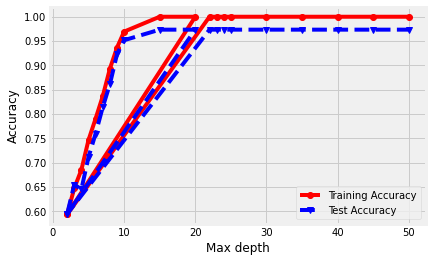

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,2,22,23,24,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(criterion='entropy',max_depth=depth,random_state=450)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

In [ ]:
# Decision Tree technique
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=7, random_state=450)
clf.fit(X_train, y_train)
y_predict_test = clf.predict(X_test)
print(confusion_matrix(y_test, y_predict_test))
print("Accuracy of Decision Tree Technique is:", accuracy_score(y_test, y_predict_test)*100)
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_predict_test, digits = 3))

[[192  59   0   0]
 [ 47 411   4   0]
 [ 17  20  33   0]
 [  0   7   0  39]]
Accuracy of Decision Tree Technique is: 81.42340168878167

Classification Report
              precision    recall  f1-score   support

           0      0.750     0.765     0.757       251
           1      0.827     0.890     0.857       462
           2      0.892     0.471     0.617        70
           3      1.000     0.848     0.918        46

    accuracy                          0.814       829
   macro avg      0.867     0.743     0.787       829
weighted avg      0.819     0.814     0.810       829



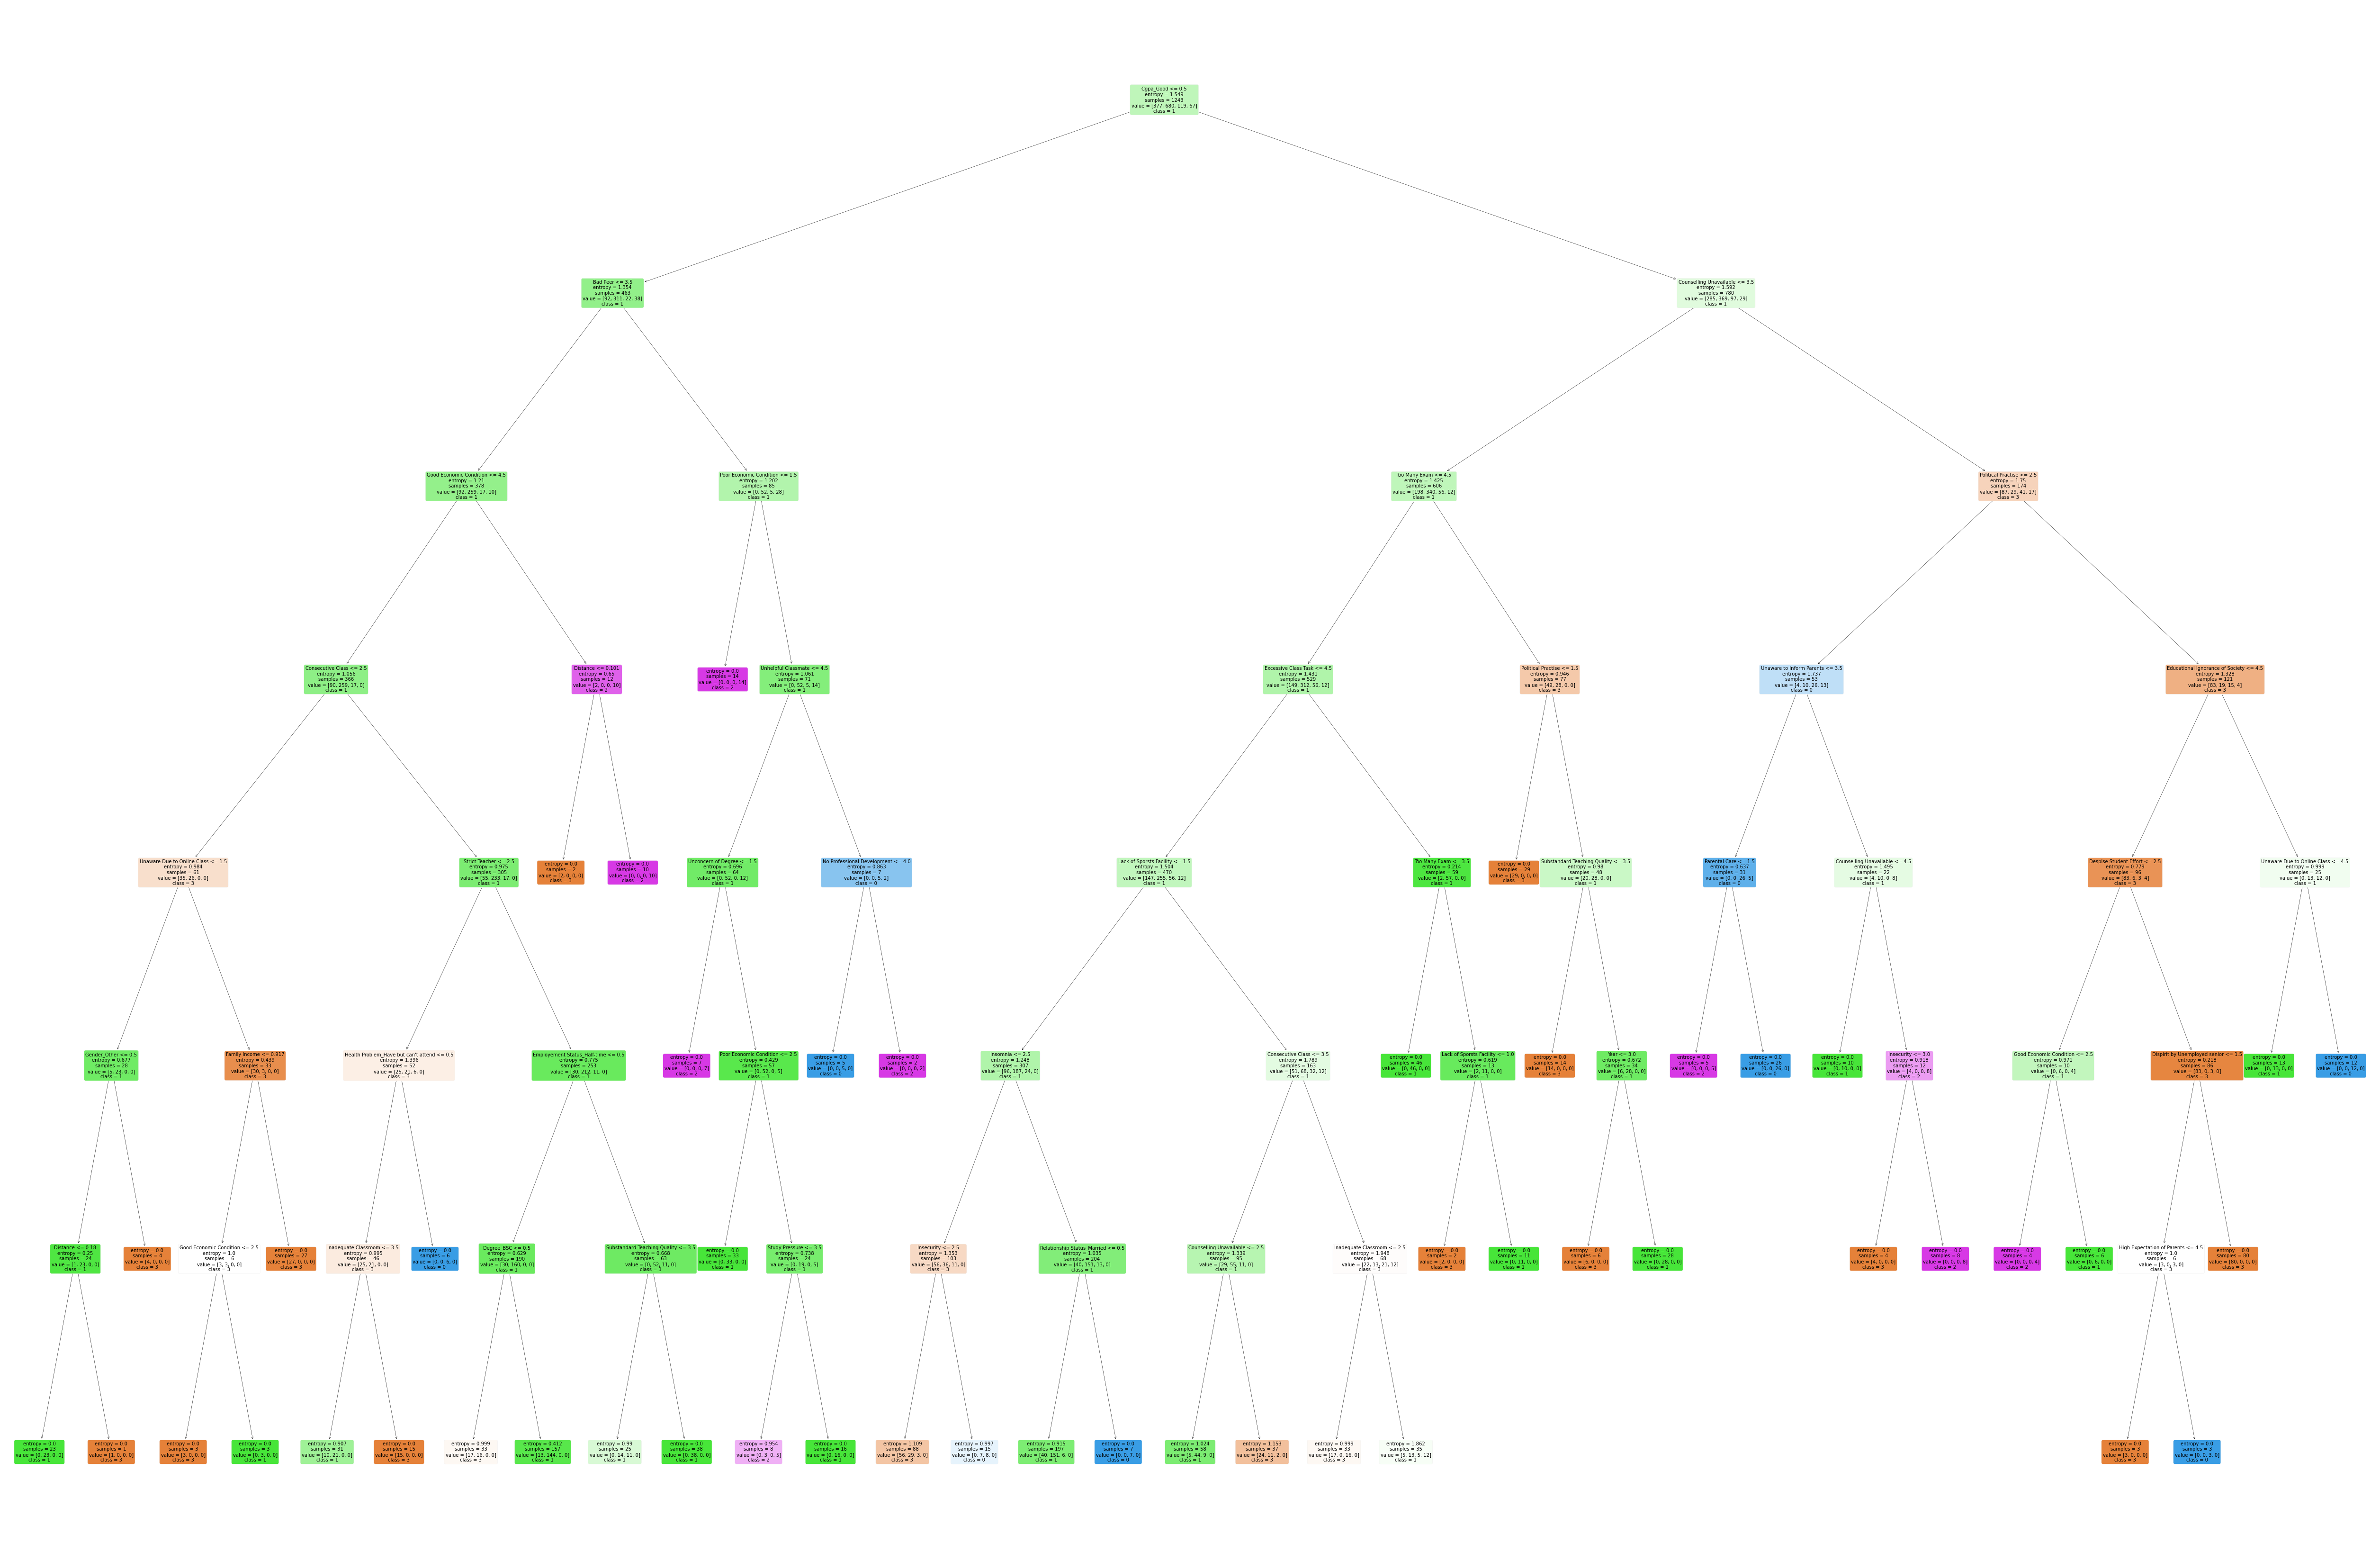

In [ ]:
#visualize the tree
#print(tree.export_text(dt_model))
all_feature_data =X_train.append(X_test,sort=False)
all_target_data=target
from sklearn import tree
plt.figure(figsize=(80,60))
tree.plot_tree(clf,feature_names=all_feature_data.columns,class_names=all_target_data.unique().astype(str), filled=True,rounded=True, fontsize=10)
plt.show()

In [ ]:
#K-fold cross validation
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

kfold_validation = KFold(n_splits = 10)
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=7, random_state=450)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
results = cross_val_score(clf, all_feature_data, all_target_data, cv = kfold_validation)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))


[0.49038462 0.67788462 0.52657005 0.5410628  0.41545894 0.51207729
 0.40096618 0.5942029  0.53140097 0.4589372 ]

Results =  0.5148945559271646 +/- 0.07781782882883773

Classification Report
              precision    recall  f1-score   support

           0      0.750     0.765     0.757       251
           1      0.827     0.890     0.857       462
           2      0.892     0.471     0.617        70
           3      1.000     0.848     0.918        46

    accuracy                          0.814       829
   macro avg      0.867     0.743     0.787       829
weighted avg      0.819     0.814     0.810       829



In [ ]:
#Shuffle Split crossvalidation
from sklearn.model_selection import ShuffleSplit
ssplit = ShuffleSplit(n_splits = 10, test_size = 0.30)
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=7, random_state=450)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
results = cross_val_score(clf, X, y, cv = ssplit)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

[0.85048232 0.81832797 0.81189711 0.79903537 0.87459807 0.8392283
 0.77652733 0.85530547 0.82475884 0.81028939]

Results =  0.8260450160771704 +/- 0.0277050279466727

Classification Report
              precision    recall  f1-score   support

           0      0.750     0.765     0.757       251
           1      0.827     0.890     0.857       462
           2      0.892     0.471     0.617        70
           3      1.000     0.848     0.918        46

    accuracy                          0.814       829
   macro avg      0.867     0.743     0.787       829
weighted avg      0.819     0.814     0.810       829



### Zero Classifier

In [ ]:
# ZeroR classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Train Accuracy:  0.5470635559131134
Test Accuracy:  0.5572979493365501

Classification Report
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       251
           1      0.557     1.000     0.716       462
           2      0.000     0.000     0.000        70
           3      0.000     0.000     0.000        46

    accuracy                          0.557       829
   macro avg      0.139     0.250     0.179       829
weighted avg      0.311     0.557     0.399       829



### KNN Classifier

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.9782870928829915 , Difference =  2.171290711700846 %
K =  5 , Training Accuracy =  0.9533386967015286  Test Accuracy =  0.887816646562123 , Difference =  6.55220501394056 %
K =  6 , Training Accuracy =  0.917135961383749  Test Accuracy =  0.8540410132689988 , Difference =  6.309494811475014 %
K =  7 , Training Accuracy =  0.8970233306516492  Test Accuracy =  0.8311218335343787 , Difference =  6.590149711727045 %
K =  10 , Training Accuracy =  0.833467417538214  Test Accuracy =  0.7647768395657418 , Difference =  6.869057797247214 %
K =  15 , Training Accuracy =  0.7562349155269509  Test Accuracy =  0.6948130277442702 , Difference =  6.142188778268065 %
K =  20 , Training Accuracy =  0.6838294448913917  Test Accuracy =  0.669481302774427 , Difference =  1.434814211696478 %
K =  25 , Training Accuracy =  0.6532582461786002  Test Accuracy =  0.6417370325693607 , Difference =  1.1521213609239522 %
K =  30 , Training Accuracy =  0.615446

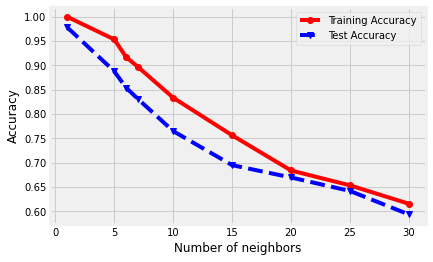

In [ ]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5,6,7, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [ ]:
#Shuffle Split crossvalidation
from sklearn.model_selection import ShuffleSplit
ssplit = ShuffleSplit(n_splits = 10, test_size = 0.30)
clf = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
clf.fit(X_train, y_train)
y_predTrain = clf.predict(X_train)
y_predTest = clf.predict(X_test)
y_pred_test = clf.predict(X_test)
results = cross_val_score(clf, X, y, cv = ssplit)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

[0.81350482 0.88424437 0.85369775 0.84405145 0.85048232 0.86012862
 0.83118971 0.86012862 0.81832797 0.87138264]

Results =  0.8487138263665595 +/- 0.021346341557944227

Classification Report
              precision    recall  f1-score   support

           0      0.755     0.849     0.799       251
           1      0.881     0.848     0.864       462
           2      0.766     0.700     0.731        70
           3      0.921     0.761     0.833        46

    accuracy                          0.831       829
   macro avg      0.831     0.789     0.807       829
weighted avg      0.835     0.831     0.832       829



## KNN-CLassifier with Manhattan distance

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.9782870928829915 , Difference =  2.171290711700846 %
K =  5 , Training Accuracy =  0.9420756234915527  Test Accuracy =  0.8745476477683957 , Difference =  6.752797572315705 %
K =  6 , Training Accuracy =  0.909895414320193  Test Accuracy =  0.8480096501809409 , Difference =  6.188576413925217 %
K =  7 , Training Accuracy =  0.8889782783588094  Test Accuracy =  0.8347406513872135 , Difference =  5.423762697159584 %
K =  9 , Training Accuracy =  0.8471440064360418  Test Accuracy =  0.7744270205066345 , Difference =  7.271698592940734 %
K =  10 , Training Accuracy =  0.8222043443282381  Test Accuracy =  0.7539203860072377 , Difference =  6.828395832100043 %
K =  12 , Training Accuracy =  0.7795655671761866  Test Accuracy =  0.715319662243667 , Difference =  6.424590493251959 %
K =  14 , Training Accuracy =  0.7514078841512469  Test Accuracy =  0.6851628468033776 , Difference =  6.624503734786935 %
K =  15 , Training Accuracy =  0.75784

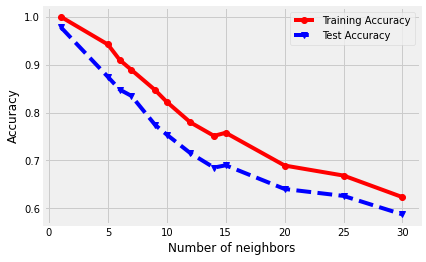

In [ ]:
#KNN with Manhattan distance
numNeighbors = [1, 5,6,7,9, 10, 12,14, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [ ]:
#Shuffle Split crossvalidation
from sklearn.model_selection import ShuffleSplit
ssplit = ShuffleSplit(n_splits = 10, test_size = 0.30)
clf = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=1)
clf.fit(X_train, y_train)
y_predTrain = clf.predict(X_train)
y_predTest = clf.predict(X_test)
y_pred_test = clf.predict(X_test)
results = cross_val_score(clf, X, y, cv = ssplit)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

[0.86173633 0.87299035 0.8778135  0.84083601 0.85369775 0.8681672
 0.8488746  0.8681672  0.8585209  0.84726688]

Results =  0.8598070739549838 +/- 0.01147689279586801

Classification Report
              precision    recall  f1-score   support

           0      0.798     0.805     0.802       251
           1      0.861     0.874     0.868       462
           2      0.722     0.743     0.732        70
           3      0.971     0.739     0.840        46

    accuracy                          0.835       829
   macro avg      0.838     0.790     0.810       829
weighted avg      0.837     0.835     0.835       829



## Logistic Regrassion

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))


Logistic Regression with no regularization
Train Accuracy:  0.7514078841512469
Test Accuracy:  0.7225572979493365


Classification Report
              precision    recall  f1-score   support

           0      0.644     0.570     0.605       251
           1      0.742     0.803     0.771       462
           2      0.682     0.643     0.662        70
           3      0.976     0.870     0.920        46

    accuracy                          0.723       829
   macro avg      0.761     0.721     0.739       829
weighted avg      0.720     0.723     0.720       829

Logistic Regression with L2 regularization
Train Accuracy:  0.7393403057119872
Test Accuracy:  0.7117008443908324

Classification Report
              precision    recall  f1-score   support

           0      0.627     0.542     0.581       251
           1      0.728     0.812     0.768       462
           2      0.690     0.571     0.625        70
           3      1.000     0.848     0.918        46

    accuracy      

## Simple Perceptron

In [ ]:
#Perceptron
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Train Accuracy:  0.5486725663716814
Test Accuracy:  0.5645355850422196

Classification Report
              precision    recall  f1-score   support

           0      0.816     0.159     0.267       251
           1      0.769     0.721     0.744       462
           2      0.204     0.886     0.332        70
           3      0.767     0.717     0.742        46

    accuracy                          0.565       829
   macro avg      0.639     0.621     0.521       829
weighted avg      0.736     0.565     0.565       829



## Naive Bayes 

In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Train Accuracy:  0.6580852775543041
Test Accuracy:  0.6417370325693607

Classification Report
              precision    recall  f1-score   support

           0      0.613     0.347     0.443       251
           1      0.637     0.894     0.744       462
           2      0.737     0.200     0.315        70
           3      0.900     0.391     0.545        46

    accuracy                          0.642       829
   macro avg      0.722     0.458     0.512       829
weighted avg      0.653     0.642     0.606       829



## SVC - Classifier

In [ ]:
#SVC  classifier
from sklearn.svm import SVC
from sklearn import metrics
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Train Accuracy:  0.919549477071601
Test Accuracy:  0.8721351025331725
Classification Report
              precision    recall  f1-score   support

           0      0.872     0.789     0.828       251
           1      0.851     0.950     0.898       462
           2      1.000     0.686     0.814        70
           3      1.000     0.826     0.905        46

    accuracy                          0.872       829
   macro avg      0.931     0.813     0.861       829
weighted avg      0.878     0.872     0.870       829



In [ ]:
# for the SVC classifier
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[198  53   0   0]
 [ 23 439   0   0]
 [  6  16  48   0]
 [  0   8   0  38]]

Classification Report
              precision    recall  f1-score   support

           0      0.872     0.789     0.828       251
           1      0.851     0.950     0.898       462
           2      1.000     0.686     0.814        70
           3      1.000     0.826     0.905        46

    accuracy                          0.872       829
   macro avg      0.931     0.813     0.861       829
weighted avg      0.878     0.872     0.870       829



## Random Forest Classifier

Depth =  2 , Training Accuracy =  0.5534995977473853 , Test Accuracy =  0.5597104945717732 , Diff =  0.6210896824387913  %
Depth =  3 , Training Accuracy =  0.6074014481094127 , Test Accuracy =  0.6007237635705669 , Diff =  0.6677684538845763  %
Depth =  4 , Training Accuracy =  0.6790024135156878 , Test Accuracy =  0.6646562123039808 , Diff =  1.4346201211707044  %
Depth =  5 , Training Accuracy =  0.7819790828640386 , Test Accuracy =  0.7539203860072377 , Diff =  2.8058696856800958  %
Depth =  6 , Training Accuracy =  0.83266291230893 , Test Accuracy =  0.8130277442702051 , Diff =  1.9635168038724893  %
Depth =  7 , Training Accuracy =  0.8921962992759453 , Test Accuracy =  0.8624849215922799 , Diff =  2.9711377683665496  %
Depth =  8 , Training Accuracy =  0.9332260659694288 , Test Accuracy =  0.8986731001206273 , Diff =  3.455296584880152  %
Depth =  9 , Training Accuracy =  0.9646017699115044 , Test Accuracy =  0.9408926417370326 , Diff =  2.3709128174471794  %
Depth =  10 , Train

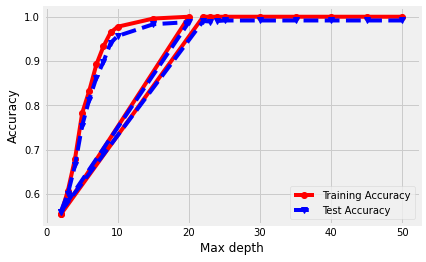

In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,2,22,23,24,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = RandomForestClassifier(criterion='gini',max_depth=depth,random_state=450)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

In [ ]:
# Random forest technique
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(criterion='gini',max_depth=6, random_state=450)
clf.fit(X_train, y_train)
y_predict_test = clf.predict(X_test)
print(confusion_matrix(y_test, y_predict_test))
print("Accuracy of Random Forest Technique is:", accuracy_score(y_test, y_predict_test)*100)
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_predict_test, digits = 3))

[[156  95   0   0]
 [  0 462   0   0]
 [  2  39  29   0]
 [  0  19   0  27]]
Accuracy of Random Forest Technique is: 81.30277442702051

Classification Report
              precision    recall  f1-score   support

           0      0.987     0.622     0.763       251
           1      0.751     1.000     0.858       462
           2      1.000     0.414     0.586        70
           3      1.000     0.587     0.740        46

    accuracy                          0.813       829
   macro avg      0.935     0.656     0.737       829
weighted avg      0.858     0.813     0.800       829



## Support Vector Machine Classifier

In [ ]:
# Design the model
from sklearn import svm
support = svm.SVC(kernel='linear')
support.fit(X_train, y_train)
y_predict = support.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print("Accuracy of Support Vector Machine through linear kernel is:", accuracy_score(y_test, y_predict)*100)
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

[[173  78   0   0]
 [ 71 384   7   0]
 [  5  12  53   0]
 [  0   0   0  46]]
Accuracy of Support Vector Machine through linear kernel is: 79.13148371531966

Classification Report
              precision    recall  f1-score   support

           0      0.987     0.622     0.763       251
           1      0.751     1.000     0.858       462
           2      1.000     0.414     0.586        70
           3      1.000     0.587     0.740        46

    accuracy                          0.813       829
   macro avg      0.935     0.656     0.737       829
weighted avg      0.858     0.813     0.800       829



##  Visualize Data

In [ ]:
#Neumerical Features
numerical_features = [ 'Year', 'Age',  'Distance',  'Family Income',  'Personal Income',  'Unconcern of Degree', 'Poor Economic Condition', 'High Expected Degree', 'Good Economic Condition', 'Dispirit by Unemployed senior', 'Health Trouble', 'Insomnia', 'Insecurity', 'Thought of Failing', 'Study Pressure', 'High Expectation of Parents', 'Parental Care', 'Bad Peer', 'Trafficjam', 'Inclement Weather', 'Ethnicity', 'Educational Ignorance of Society', 'Job Opportunity', 'Substandard Teaching Quality', 'Monotonous Class', 'Neglected by Teacher', 'Teacher Unaware of Absenteeism', 'Despise Student Effort', 'Strict Teacher', 'Theroretic Class', 'Excessive Class Task', 'Irrelavent Course', 'Dissimilar Course Content', 'Difficulty in Understanding', 'Too Many Exam', 'Internet Help', 'Consecutive Class', 'Inadequate Classroom', 'Unhelpful Classmate', 'Bullied by Classmate',
       'Unaware Due to Online Class', 'Counselling Unavailable', 'Political Practise', 'No Professional Development', 'Unaware to Inform Parents', 'Lack of Sporsts Facility', 'Language Skills', 'Absence Days']
#Catagorical Features
catagorical_features = ['Reason of Absence','Degree', 'Housing','Cgpa','Housing', 'Employement Status', 'Gender','Relationship Status','Health Problem']

In [ ]:
visualize_df= df

In [ ]:
visualize_df.head()

Reason of Absence Degree  Year  Age Gender      Housing  Distance     Cgpa Relationship Status  Family Income Employement Status  Personal Income     Health Problem  Unconcern of Degree  Poor Economic Condition  High Expected Degree  Good Economic Condition  Dispirit by Unemployed senior  Health Trouble  Insomnia  Insecurity  Thought of Failing  Study Pressure  High Expectation of Parents  Parental Care  Bad Peer  Trafficjam  Inclement Weather  Ethnicity  Educational Ignorance of Society  Job Opportunity  Substandard Teaching Quality  Monotonous Class  Neglected by Teacher  Teacher Unaware of Absenteeism  Despise Student Effort  Strict Teacher  Theroretic Class  Excessive Class Task  Irrelavent Course  Dissimilar Course Content  Difficulty in Understanding  Too Many Exam  Internet Help  Consecutive Class  Inadequate Classroom  Unhelpful Classmate  Bullied by Classmate  Unaware Due to Online Class  Counselling Unavailable  Political Practise  No Professional Development  \
0                  6    BSC     4   24   Male  With Family         1  Average              Single          35000          Half-time                0  No health problem                    3                        3                     3                        2                              3               4         4           3                   4               3                            3              3         4           4                  4          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                  4                     3                    4                     3                            4                        3                   2                            3   
1                  7    BSC     4   24   Male  With Family         1  Average              Single          35000          Half-time                0  No health problem                    3                        3                     3                        2                              3               4         4           3                   4               3                            3              3         4           4                  4          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                  4                     3                    4                     3                            4                        3                   2                            3   
2                 12    BSC     4   24   Male  With Family         1  Average              Single          35000          Half-time                0  No health problem                    3                        3                     3                        2                              3               4         4           3                   4               3                            3              3         4           4                  4          3                                 3                4                             4                 4                     4                               3                       4               4                 4                     4                  3                          3                            3              4              4                  4                     3                    4                     3                            4                        3                   2                            3   
3                 14    BSC     4   24   Ma

In [ ]:
print(sorted(df['Reason of Absence'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [ ]:
new_df = visualize_df
reasons = {     
           1: 'House is far from the university',
           2: 'Transportation problem: Shortage of public commuting services',
           3: 'Lower economic income',
           4: 'I help my parents in their work, usually',
           5: 'I work and earn some money for my family while remaining absent',
           6: 'Have alternative leisure plans: cafeteria, sports, etc',
           7: 'Sleeping habit during class time',
           8: 'Back to back classes.',
           9: 'Become tired due to previous class',
           10: 'Problem with my parents',
           11: 'Financial Problem',
           12: 'Dont have any problems',
           13: 'Lecture quality is not good',
           14: 'Availability of recorded lecture material',

           15: 'Somewhat Easy to make up missed lecture',
           16: 'Very Difficult to understand the lecture',
           17: 'Internet packages are costly',
           
           18: 'Bad internet connection',
           19: 'Social media distraction',
           20: 'Movies/drugs/other attractions',
           21: 'Preparation for other courses',

           22: 'Health problems',
           23: 'Family members death'}

new_df['Reason description'] = df['Reason of Absence'].map(reasons)

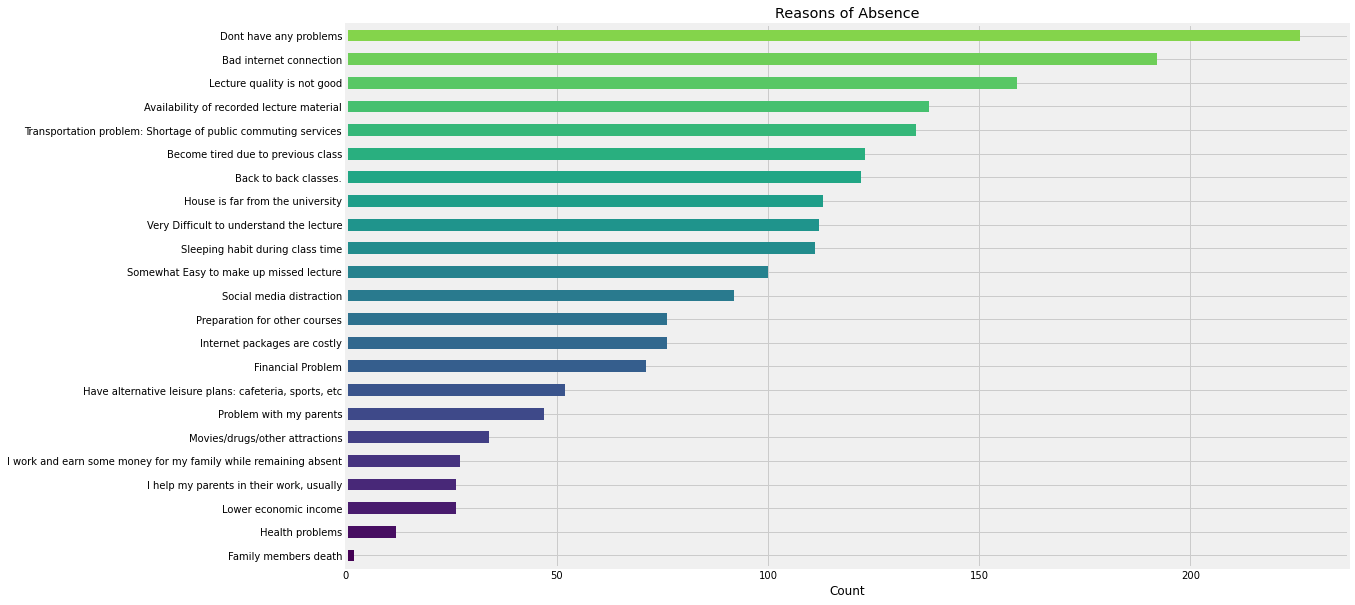

In [ ]:
from matplotlib import cm
viridis = cm.get_cmap('viridis', 28) #import colormap

plt.figure(figsize=(16,10))

df['Reason description'].value_counts().sort_values().plot(kind='barh', 
                                                           color=viridis(np.linspace(0, 1, 28)))

plt.xlabel('Count')
plt.title('Reasons of Absence')
plt.show()

Grouping 'Reason for absence' into 4 main categories:

1-9 - Social/economical/environmental related problem

10-12 - Family and Financial related Problem

13-21 - Teacher and Class environment related problem

22-23 - Health Problem

In [ ]:
def reason(record):
    if record == 0:
        return 'Present'
    elif (record > 0) & (record < 10):
        return 'Social/Economical/Environmental'
    elif (record > 9) & (record < 13):
        return 'Family/Financial'
    elif (record > 12) & (record < 22):
        return 'Tutor/Class Environment'
    else:
        return 'Health Problem'
    
new_df['Reason of Absence'] = new_df['Reason of Absence'].apply(reason)

In [ ]:
new_df.drop('Reason description', axis=1, inplace=True)

In [ ]:
#For Darker Background
#!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
#plt.style.use("dark_background")

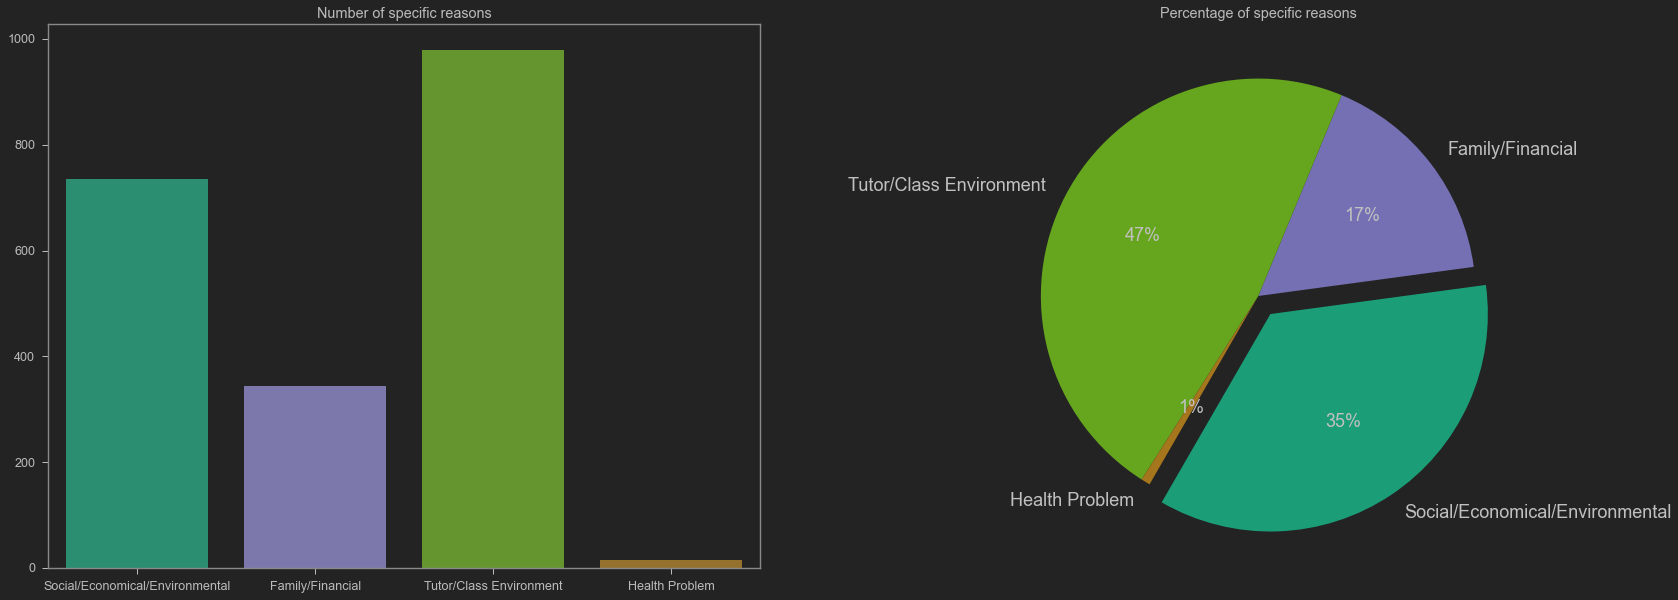

In [ ]:
socio_econo_env  = df[df['Reason of Absence']=='Social/Economical/Environmental']['Reason of Absence'].count()    #int
family_finance = df[df['Reason of Absence']=='Family/Financial']['Reason of Absence'].count()   #int
teacher_class_env  = df[df['Reason of Absence']=='Tutor/Class Environment']['Reason of Absence'].count()    #int
health   = df[df['Reason of Absence']=='Health Problem']['Reason of Absence'].count()     #int

dark = cm.get_cmap('Dark2') #import colormap
fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(25, 10))

axes[0]=plt.subplot(1,2,1)
sns.barplot(y = [socio_econo_env, family_finance, teacher_class_env, health],
            x = ['Social/Economical/Environmental','Family/Financial', 'Tutor/Class Environment','Health Problem'], 
            palette=dark(np.linspace(0, 2, 8)))
plt.title('Number of specific reasons')

axes[1]=plt.subplot(1,2,2)
plt.pie([socio_econo_env, family_finance, teacher_class_env, health],
        labels = ['Social/Economical/Environmental','Family/Financial', 'Tutor/Class Environment','Health Problem'],
        autopct = '%1.0f%%',
        textprops={'fontsize': 18, 'color':'silver'},
        startangle = -120,
        explode = [0.1,0,0,0],
        colors = dark(np.linspace(0, 2, 8)))
plt.title("Percentage of specific reasons")

plt.show()